# Read in the data

In [1]:
#dir='/Users/tianyichen/Desktop/Research /PhDresearch/SwarmTheorem/Organoid/Reproduce/well_8/'
dir='/Users/parky/Dropbox/Organoid/Paper/Ans/Codes/well_8/'
import pandas as pd 

In [2]:
filename=['1.csv','129.csv','146.csv','174.csv','202.csv','232.csv','244.csv','52.csv','76.csv',
'103.csv','130.csv','153.csv','181.csv','209.csv','234.csv','34.csv','55.csv','80.csv',
'11.csv','132.csv','160.csv','188.csv','216.csv','236.csv','4.csv','63.csv','83.csv',
'111.csv','139.csv','167.csv','192.csv','223.csv','238.csv','45.csv','69.csv','90.csv',
'117.csv','140.csv','17.csv','195.csv','229.csv','240.csv','48.csv','70.csv','97.csv']
len(filename)

45

In [3]:
## Get time stamps 
tm=list()
for i in range(len(filename)):
    tm.append(int(filename[i].split('.')[0]))
tm.sort()
#tm

In [4]:
import pandas as pd 
import numpy as np

In [5]:
## Read in the data and get name of all vertices 
d=list()
for i in range(len(tm)):
    myFile = pd.read_csv(dir+str(tm[i])+'.csv', sep=',')
    f=myFile.to_numpy()
    a=list(np.unique(f[:,[0,1]]))
    d=d+a
d=np.unique(d)
#d no 5_7 positive!!! 

In [6]:
## convert edgelist to adjacency matrices 
adj=np.zeros([len(tm),len(d),len(d)])
for i in range(len(tm)):
    myFile = pd.read_csv(dir+str(tm[i])+'.csv', sep=',')
    f=myFile.to_numpy()
    #print(i)
    for j in range(len(f[:,0])):
        fro=np.where(d==f[j,0])[0][0]
        to=np.where(d==f[j,1])[0][0]
        adj[i][fro,to]=f[j,2]

In [7]:
from scipy.optimize import quadratic_assignment
from graspologic.utils import binarize, symmetrize,pass_to_ranks
import graspologic.utils as graspologic_utils

In [8]:
#symmetrized then pass to rank
for i in range(len(tm)):
     adj[i]=pass_to_ranks(symmetrize(adj[i]))
        #adj[i]=symmetrize(pass_to_ranks(adj[i]))

# Graph matching

In [9]:
## compare OFV of I and FAQ solution for all 44 pairs 
num_ver=list()
num_edges=list()
f_blist=list()
f_i=list()
for i in range(len(tm)):
    num_ver.append(sum(sum(adj[i])>0))
    num_edges.append(sum(sum(adj[i]>0))/2)
for i in range(len(tm)-1):
    res = quadratic_assignment(adj[i], adj[i+1],options = {'maximize': True})  # FAQ is default method
    f_blist.append(res['fun'])
    fun_I = np.trace(adj[i].T  @ adj[i+1] )
    f_i.append(fun_I)

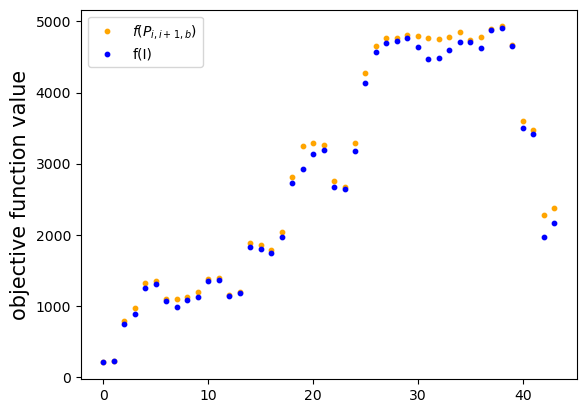

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(tm)-1), f_blist, s=10, c='orange', marker="o", label=r'$f(P_{i,i+1,b})$' )
ax1.scatter(range(len(tm)-1), f_i, s=10, c='b', marker="o", label='f(I)')
plt.legend(loc='upper left')
plt.ylabel('objective function value',fontsize=15)
#plt.savefig('well_8fig21.pdf') 
plt.show()

Text(0, 0.5, '$\\frac{f(P_{i,i+1,b})}{f(I)}$')

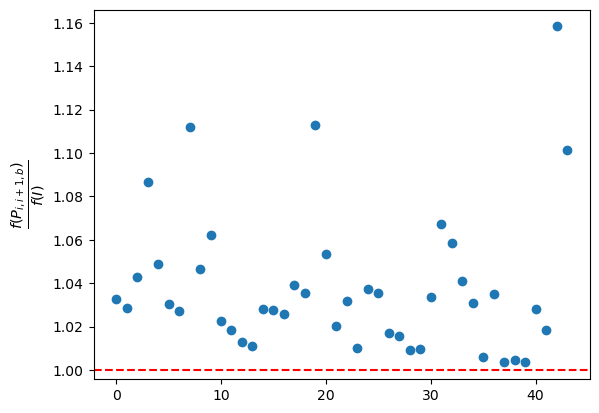

In [11]:
ratio=np.array(f_blist)/np.array(f_i)
plt.scatter(range(len(tm)-1),ratio)
plt.axhline(y = 1, color = 'r', linestyle = 'dashed')
plt.ylabel(r'$\frac{f(P_{i,i+1,b})}{f(I)}$',fontsize=15)
#plt.savefig('well_8fig22.pdf',bbox_inches='tight')

In [12]:
import matplotlib.pyplot as plt

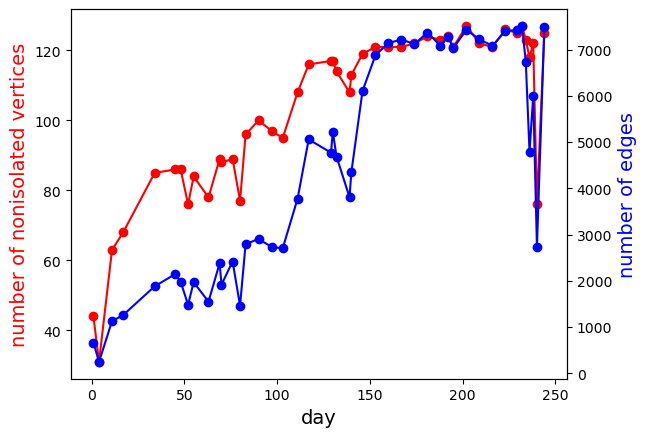

In [13]:
## plot number of nonisolated vertices and edges 
fig,ax = plt.subplots()
ax.plot(tm,
        num_ver,
        color="red", 
        marker="o")
ax.set_xlabel("day", fontsize = 14)
ax.set_ylabel("number of nonisolated vertices",
              color="red",
              fontsize=14)
ax2=ax.twinx()
ax2.plot(tm, num_edges,color="blue",marker="o")
ax2.set_ylabel("number of edges",color="blue",fontsize=14)
plt.savefig('well_8fig1.pdf',bbox_inches='tight')
plt.show()

## Compare a specific pair $A_{28}$ and $A_{29}$

In [14]:
## get OFV for 100,000 random permutative matrix 
k=28
fov_ran=list()
for i in range(100000):
    P = np.eye(127, dtype=int)[np.random.permutation(127)]
    fov_ran.append(np.trace(adj[k].T @ P @ adj[k+1] @ P.T))
res = quadratic_assignment(adj[k], adj[k+1],options = {'maximize': True}) 
fun_faq_b=res['fun']
fun_I = np.trace(adj[k].T  @ adj[k+1] )

## get OFV for 1000 FAQ solutions with random permutative matrix initial

fun_faq_r=list()
for i in range(1000):
    P = np.eye(127, dtype=int)[np.random.permutation(127)]
    res=quadratic_assignment(adj[k], adj[k+1],options = {'maximize': True,"P0": P } )
    fun_faq_r.append(res['fun'])

In [15]:
res = quadratic_assignment(adj[k], adj[k+1],options = {'maximize': True,"P0": np.eye(127, dtype=int)})  
fun_faq_I=res['fun']

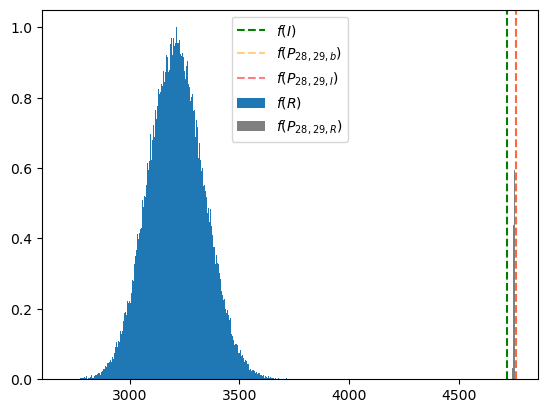

In [16]:
dist1 = fov_ran
dist2 = fun_faq_r

min1=min(dist1)
min2=min(dist2)
max1=max(dist1)
max2=max(dist2)
##computing the bin properties (same for both distributions)
num_bin1 = 300
num_bin2 = 100
bin_lims1 = np.linspace(min1,max1,num_bin1+1)
bin_lims2 = np.linspace(min2,max2,num_bin2+1)

bin_centers1 = 0.5*(bin_lims1[:-1]+bin_lims1[1:])
bin_centers2 = 0.5*(bin_lims2[:-1]+bin_lims2[1:])

bin_widths1 = bin_lims1[1:]-bin_lims1[:-1]
bin_widths2 = bin_lims2[1:]-bin_lims2[:-1]

##computing the histograms
hist1, _ = np.histogram(dist1, bins=bin_lims1)
hist2, _ = np.histogram(dist2, bins=bin_lims2)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

plt.bar(bin_centers1, hist1b, width = bin_widths1, align = 'center',label=r'$f(R)$')
plt.bar(bin_centers2, hist2b, width = bin_widths2, align = 'center',color='grey',label=r'$f(P_{28,29,R})$')
plt.axvline(fun_I,color='green',linestyle='dashed',label=r'$f(I)$')
plt.axvline(fun_faq_b,color='orange',linestyle='dashed',alpha=0.5,label=r'$f(P_{28,29,b})$')
plt.axvline(fun_faq_I,color='red',linestyle='dashed',alpha=0.5,label=r'$f(P_{28,29,I})$')
plt.legend()

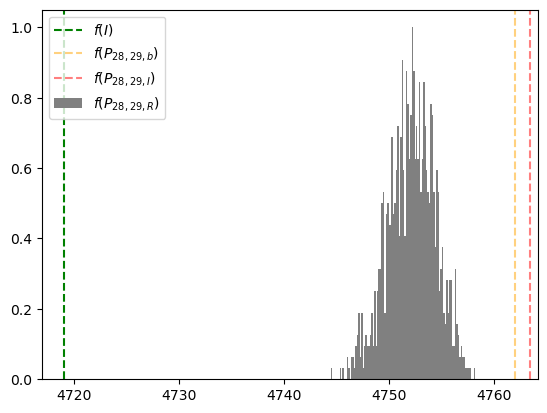

In [17]:
plt.bar(bin_centers2, hist2b, width = bin_widths2, align = 'center',color='grey',label=r'$f(P_{28,29,R})$')
plt.axvline(fun_I,color='green',linestyle='dashed',label=r'$f(I)$')
plt.axvline(fun_faq_b,color='orange',linestyle='dashed',alpha=0.5,label=r'$f(P_{28,29,b})$')
plt.axvline(fun_faq_I,color='red',linestyle='dashed',alpha=0.5,label=r'$f(P_{28,29,I})$')
plt.legend(loc='upper left')
#plt.savefig('well_8fig_cumur.pdf',bbox_inches='tight')

## Specific pair for $A_{1}$ and $A_{45}$

In [18]:
fov_ran=list()
for i in range(1000):
    P = np.eye(127, dtype=int)[np.random.permutation(127)]
    fov_ran.append(np.trace(adj[0].T @ P @ adj[44] @ P.T))
res = quadratic_assignment(adj[0], adj[44],options = {'maximize': True})  # FAQ is default method
#print(res)
fun_faq_b=res['fun']
fun_I = np.trace(adj[0].T  @ adj[44] )

In [19]:
fun_faq_b/fun_I

1.2412610787532465

In [20]:
res = quadratic_assignment(adj[0], adj[44],options = {'maximize': True,"P0": np.eye(127, dtype=int)})  # FAQ is default method
fun_faq_I=res['fun']

In [21]:
#quadratic_assignment(adj[k], adj[k+1],options = {'maximize': True,"P0": "randomized"})
fun_faq_r=list()
for i in range(1000):
    P = np.eye(127, dtype=int)[np.random.permutation(127)]
    res=quadratic_assignment(adj[0], adj[44],options = {'maximize': True,"P0": P } )
    fun_faq_r.append(res['fun'])

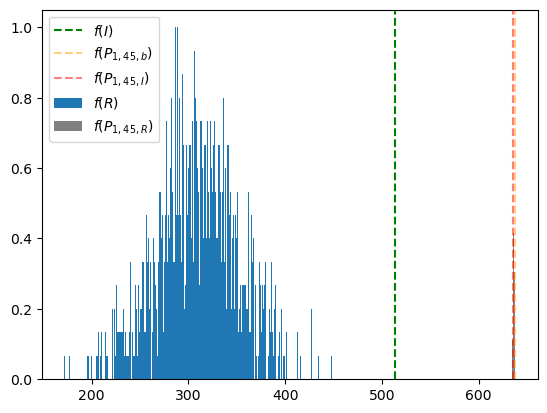

In [22]:
dist1 = fov_ran
dist2 = fun_faq_r

min1=min(dist1)
min2=min(dist2)
max1=max(dist1)
max2=max(dist2)
##computing the bin properties (same for both distributions)
num_bin1 = 300
num_bin2 = 100
bin_lims1 = np.linspace(min1,max1,num_bin1+1)
bin_lims2 = np.linspace(min2,max2,num_bin2+1)

bin_centers1 = 0.5*(bin_lims1[:-1]+bin_lims1[1:])
bin_centers2 = 0.5*(bin_lims2[:-1]+bin_lims2[1:])

bin_widths1 = bin_lims1[1:]-bin_lims1[:-1]
bin_widths2 = bin_lims2[1:]-bin_lims2[:-1]

##computing the histograms
hist1, _ = np.histogram(dist1, bins=bin_lims1)
hist2, _ = np.histogram(dist2, bins=bin_lims2)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

plt.bar(bin_centers1, hist1b, width = bin_widths1, align = 'center',label=r'$f(R)$')
plt.bar(bin_centers2, hist2b, width = bin_widths2, align = 'center',color='grey',label=r'$f(P_{1,45,R})$')
plt.axvline(fun_I,color='green',linestyle='dashed',label=r'$f(I)$')
plt.axvline(fun_faq_b,color='orange',linestyle='dashed',alpha=0.5,label=r'$f(P_{1,45,b})$')
plt.axvline(fun_faq_I,color='red',linestyle='dashed',alpha=0.5,label=r'$f(P_{1,45,I})$')
plt.legend()
#plt.savefig('well_8fig_cumul.pdf',bbox_inches='tight')

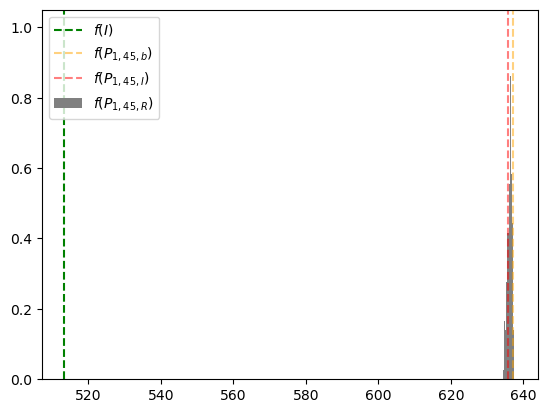

In [23]:
plt.bar(bin_centers2, hist2b, width = bin_widths2, align = 'center',color='grey',label=r'$f(P_{1,45,R})$')
plt.axvline(fun_I,color='green',linestyle='dashed',label=r'$f(I)$')
plt.axvline(fun_faq_b,color='orange',linestyle='dashed',alpha=0.5,label=r'$f(P_{1,45,b})$')
plt.axvline(fun_faq_I,color='red',linestyle='dashed',alpha=0.5,label=r'$f(P_{1,45,I})$')
plt.legend(loc='upper left')
#plt.savefig('well_8fig_cumur.pdf',bbox_inches='tight')

# Iso-mirror 

In [24]:
adj=np.zeros([len(tm),128,128])
for i in range(len(tm)):
    myFile = pd.read_csv(dir+str(tm[i])+'.csv', sep=',')
    f=myFile.to_numpy()
    #print(i)
    for j in range(len(f[:,0])):
        fro=np.where(d==f[j,0])[0][0]
        to=np.where(d==f[j,1])[0][0]
        adj[i][fro,to]=f[j,2]

In [25]:
#symmetrized then pass to rank
for i in range(len(tm)):
    adj[i]=pass_to_ranks(symmetrize(adj[i]))

In [26]:
## choose time stamps 
ytm=np.array([167, 174, 181, 188, 195, 202, 209, 216, 223, 229] )
a=np.zeros(len(ytm))
for i in range(len(ytm)):
    a[i]=np.where(tm ==ytm[i])[0][0]
a=a.astype(int)

In [27]:
a

array([28, 29, 30, 31, 33, 34, 35, 36, 37, 38])

## Find largest connected common component 

In [28]:
k=a[0]
## product all adj mat to get common edges 
prod=adj[k]
for i in a[1:len(a)]:
    prod=prod * adj[i]
    #print(i)

In [29]:
## find the connected component for the common edge subgraph 
[aa,ind]=graspologic_utils.largest_connected_component(prod,return_inds=True)
len(ind)

112

In [30]:
## verify the lccc is connected
glist=np.zeros([len(a),len(ind),len(ind)])
for i in range(len(a)):
    #print(i-k)
    glist[i]=adj[a[i]][ind][:,ind]
    print(graspologic_utils.is_fully_connected(glist[i]))

True
True
True
True
True
True
True
True
True
True


In [31]:
## average num of edges
sum(sum(sum(glist>0)))/20

6167.5

In [32]:
from graspologic.embed import AdjacencySpectralEmbed
n=len(ind)

In [33]:
## scree plot for all graphs 
svm=np.zeros([len(a),n])
for i in range(len(a)):
    u,sv,v=np.linalg.svd(glist[i], full_matrices=True)
    svm[i,:]=sv

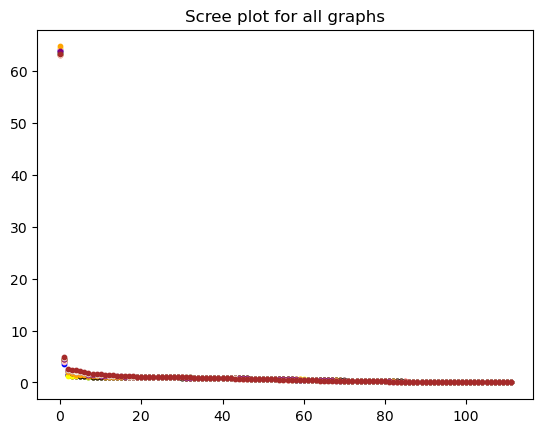

In [34]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
col=np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
for i in range(len(a)):
    ax1.scatter(range(n), svm[i,:], s=10, c=col[i], marker="o" )
#ax1.scatter(range(n), svm[1,:], s=10, c='blue', marker="o")
plt.title('Scree plot for all graphs')
plt.savefig('well_8_screeplot_ASE.pdf',bbox_inches='tight')

In [35]:
## According to scree plot we should ASE to d=1 
ed=1
Xhat_list=np.zeros([len(a),n,ed])
for i in range(len(a)):
    ase = AdjacencySpectralEmbed(n_components=ed)
    Xhat = ase.fit_transform(glist[i])
    Xhat_list[i][:,list(np.arange(ed))]=Xhat

In [36]:
## construct the distance matrix
from scipy.linalg import orthogonal_procrustes
from numpy import linalg as LA
D=np.zeros([len(a),len(a)])
for i in range(len(a)):
    for j in range(len(a)):
        R, sca = orthogonal_procrustes(Xhat_list[i] , Xhat_list[j] )
        D[i,j]=LA.norm(Xhat_list[i] @ R -  Xhat_list[j],2)**2/n    

In [37]:
J=np.ones([len(a),len(a)])/len(a)
I=np.eye(len(a))
P=I-J

Text(0, 0.5, 'eigen value')

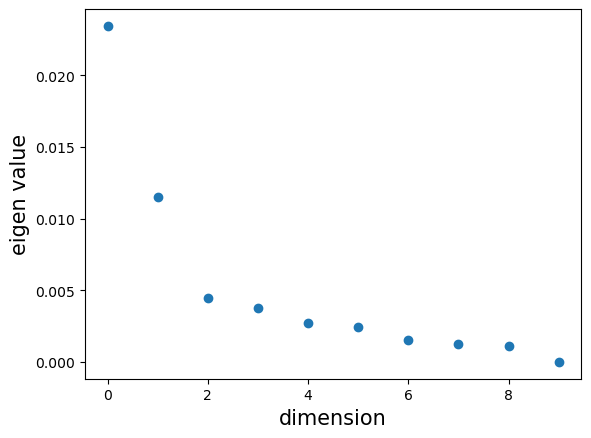

In [38]:
## MDS
H=(-1/2)*P@D@P
w,v=LA.eig(H)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]
plt.scatter(range(len(a)),w) 
#plt.title('scree plot for MDS')
plt.xlabel('dimension',fontsize=15)
plt.ylabel('eigen value',fontsize=15)
#plt.savefig('well_8_scree_plot_MDS.pdf',bbox_inches='tight')

In [39]:
d=3
MDS=v[:,:d] @ np.diag(np.sqrt(w[:d]))

Text(0, 0.5, 'dim 2')

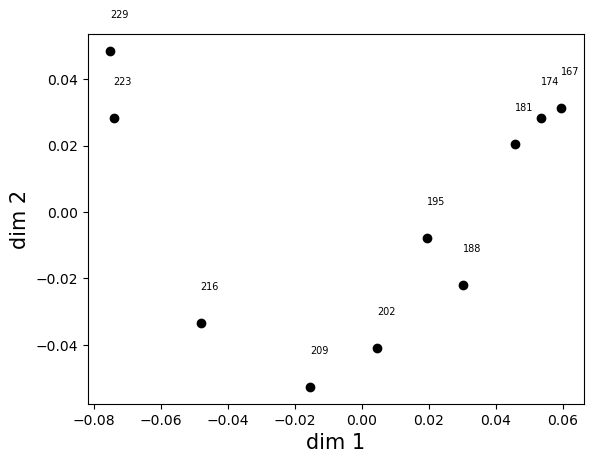

In [40]:
plt.scatter(MDS[:,0],MDS[:,1],color='black')
for i in range(len(a)):
    plt.text(MDS[i,0],MDS[i,1]+0.01,str(int(ytm[i])), fontsize=7)
plt.xlabel("dim 1",fontsize=15)
plt.ylabel("dim 2",fontsize=15)

In [41]:
## ISOMAP
from sklearn.manifold import Isomap

In [42]:
embedding = Isomap(n_neighbors=2,n_components=1)
iso = embedding.fit_transform(MDS)

In [44]:
import piecewise_regression

In [45]:
pw_fit = piecewise_regression.Fit(ytm, iso[:,0], n_breakpoints=1)

In [46]:
pw_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                       10
No. Model Parameters                    4
Degrees of Freedom                      6
Res. Sum of Squares            0.00107448
Total Sum of Squares            0.0716917
R Squared                        0.985012
Adjusted R Squared               0.973022
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -0.28197        0.152      -1.8563         0.113     -0.65366     0.089719
alpha1            0.00112287     0.000855       1.3134         0.237  -0.00096912    0.0032149
beta1             0.00436057     0.000974       4.4775             -    0.0019776    0.0067436
breakpoint1          189.709         3.94            -             -       180.07       199.35
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                       10\nNo. Model Parameters                    4\nDegrees of Freedom                      6\nRes. Sum of Squares            0.00107448\nTotal Sum of Squares            0.0716917\nR Squared                        0.985012\nAdjusted R Squared               0.973022\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst               -0.28197        0.152      -1.8563         0.113     -0.65

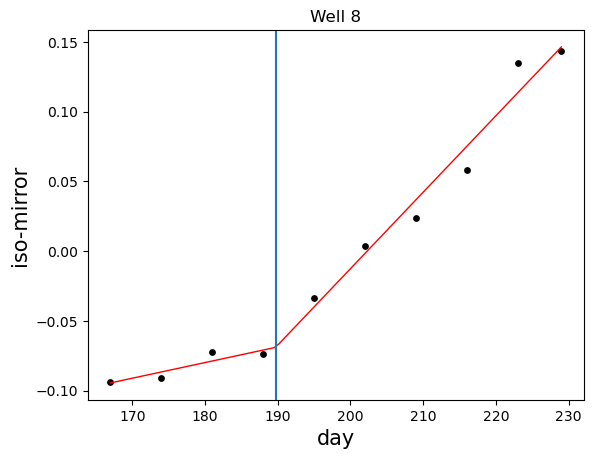

In [47]:
pw_fit.plot_data(color='black',s=15)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linewidth=1)
pw_fit.plot_breakpoints()
#pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("day",fontsize=15)
plt.ylabel("iso-mirror",fontsize=15)
plt.title('Well 8')
#for i in range(30):
#    plt.text(day[i]-1,iso[i,0]+0.01,str(int(day[i])), fontsize=7)
plt.savefig('well_8_iso_mirror_k=4.pdf',bbox_inches='tight')
plt.show()
plt.close()